In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dtrain = pd.read_csv('./dataset/boston/train.csv')

# Splitting into train and test set

In [3]:
from sklearn.model_selection import train_test_split
train, X_test, y_train, y_test = train_test_split(dtrain, dtrain['SalePrice'], test_size=0.30, random_state=42)

In [4]:
print(train.shape)
#print(test.shape)
#test and train are same

(817, 82)


In [5]:
train.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [6]:
#saving id and unnamed 0
train_ID = train["Id"]
train_unnamed = train["Unnamed: 0"]

In [7]:
#dropping ID and Unnamed 0 column
train.drop(labels = ["Id","Unnamed: 0"], axis = 1, inplace = True)

In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
593,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
788,20,RL,71.0,9520,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,293077
490,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
654,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,186500
963,20,RL,69.0,8973,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnWw,NaN,0,7,2006,WD,Abnorml,150000


## Checking Skewness and Kurtosis of target variable

Skewness: 1.72
Kurtosis: 5.11


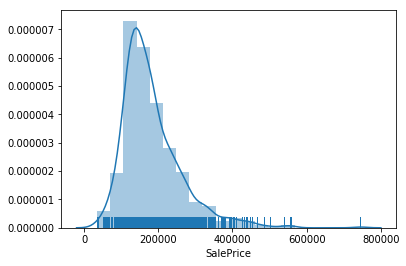

In [9]:
sns.distplot(train["SalePrice"], bins = 20 , rug = True)

print("Skewness: %0.2f" %train["SalePrice"].skew())
print("Kurtosis: %0.2f" %train["SalePrice"].kurtosis())

# Plotting correlation matrix

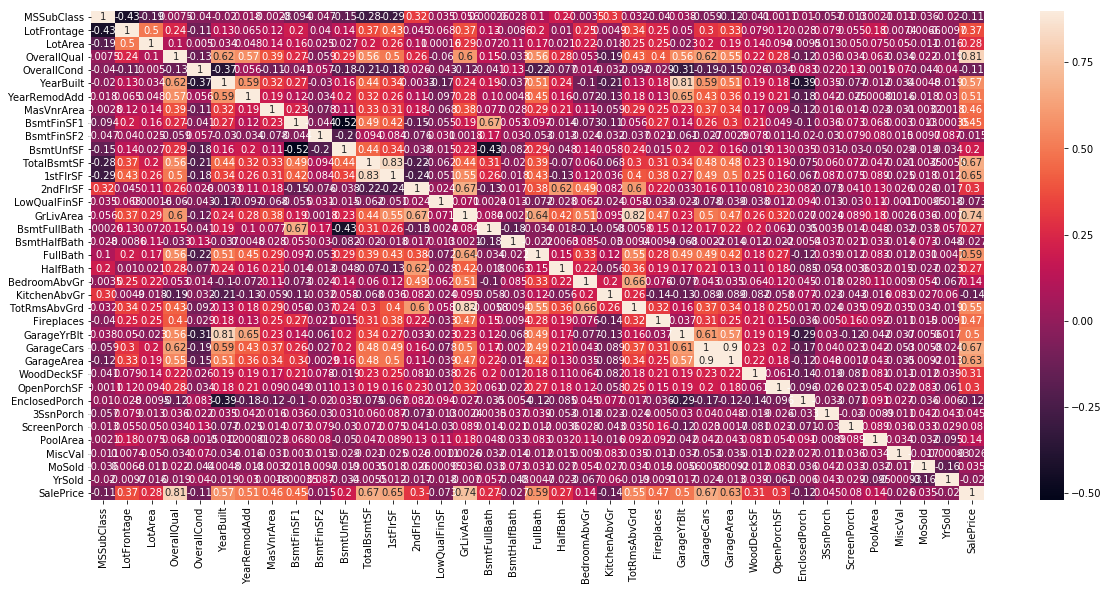

In [10]:
corrmat = train.corr()
plt.subplots(figsize = (20,9))
sns.heatmap(corrmat,vmax = 0.9, annot=True)

In [11]:
#focussing on features with correlation >=0.5
filtered_corr_mat_features = corrmat.index[abs(corrmat['SalePrice']>=0.5)]

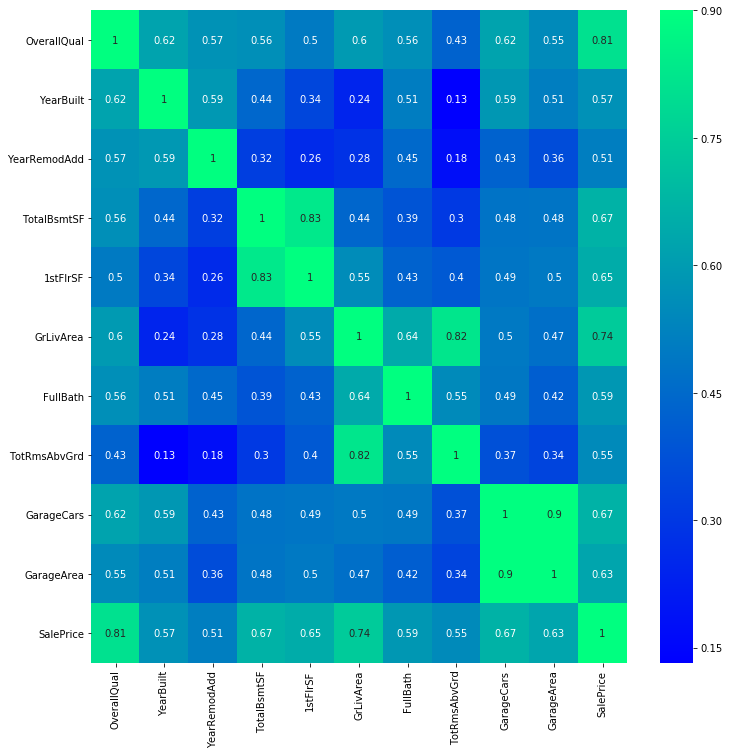

In [12]:
plt.subplots(figsize = (12,12))
sns.heatmap(train[filtered_corr_mat_features].corr(),vmax = 0.9, annot=True, cmap = 'winter')
#highly correlated variables : OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea
highly_corr_features = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars','GarageArea']

In [13]:
highly_corr_features

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

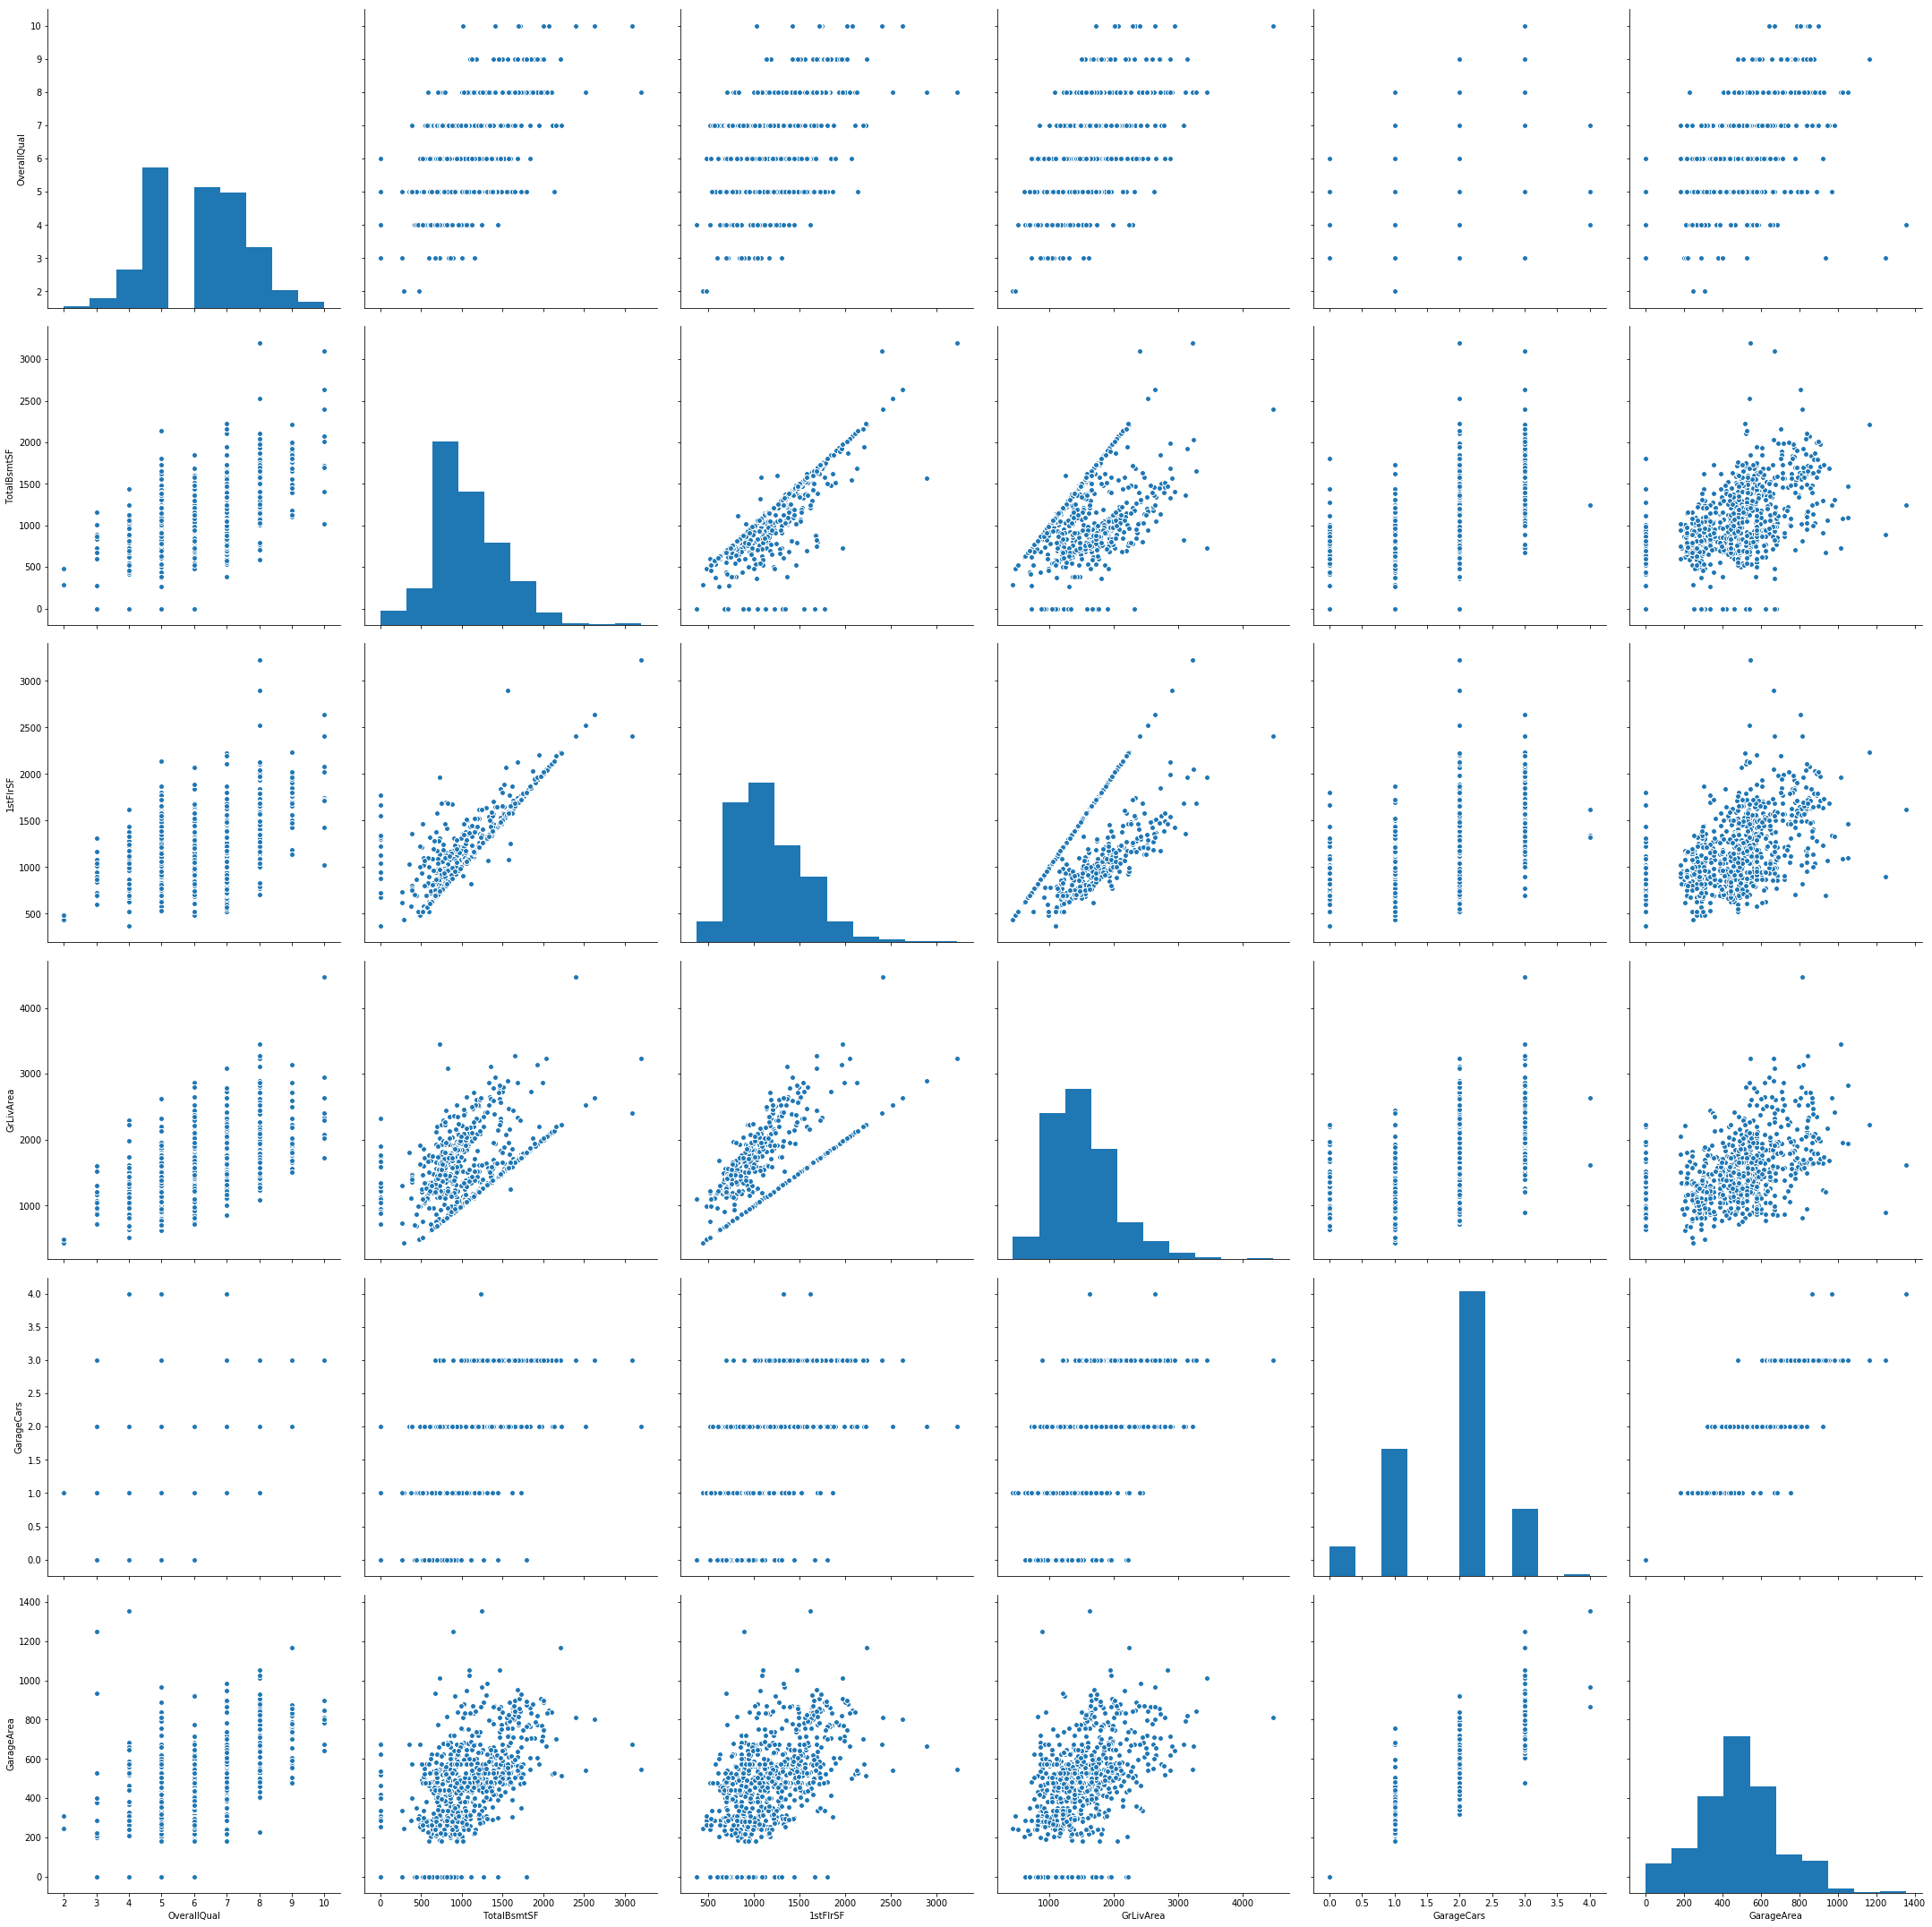

In [14]:
sns.pairplot(train[highly_corr_features], size =5,)

In [15]:
#Starting with actual preprocessing
n_train = train.shape[0]
y_train = train.SalePrice.values
#train.drop(labels = "SalePrice", axis = 1, inplace = True)


In [16]:
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
593,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
788,20,RL,71.0,9520,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,293077
490,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
654,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,186500
963,20,RL,69.0,8973,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnWw,NaN,0,7,2006,WD,Abnorml,150000


In [17]:
train.shape

(817, 80)

# Data preprocessing

In [18]:
#Preprocessing
#Handling Missing Values
#sum() only takes sum for those where isnull() returns true
totalMissing = train.isnull().sum(axis=0).sort_values(ascending = False)
totalMissing

PoolQC           812
MiscFeature      780
Alley            765
Fence            658
FireplaceQu      383
LotFrontage      142
GarageType        47
GarageCond        47
GarageFinish      47
GarageQual        47
GarageYrBlt       47
BsmtExposure      21
BsmtFinType2      20
BsmtQual          20
BsmtCond          20
BsmtFinType1      20
MasVnrArea         5
MasVnrType         5
Electrical         1
RoofMatl           0
Exterior1st        0
RoofStyle          0
ExterQual          0
Exterior2nd        0
YearBuilt          0
ExterCond          0
Foundation         0
YearRemodAdd       0
SalePrice          0
OverallCond        0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [19]:
totalCount = train.isnull().count(axis = 0).sort_values(ascending=False)
totalCount

SalePrice        817
SaleCondition    817
RoofMatl         817
Exterior1st      817
Exterior2nd      817
MasVnrType       817
MasVnrArea       817
ExterQual        817
ExterCond        817
Foundation       817
BsmtQual         817
BsmtCond         817
BsmtExposure     817
BsmtFinType1     817
BsmtFinSF1       817
BsmtFinType2     817
BsmtFinSF2       817
BsmtUnfSF        817
TotalBsmtSF      817
RoofStyle        817
YearRemodAdd     817
YearBuilt        817
Utilities        817
MSZoning         817
LotFrontage      817
LotArea          817
Street           817
Alley            817
LotShape         817
LandContour      817
                ... 
PoolArea         817
GarageCars       817
PoolQC           817
Fence            817
MiscFeature      817
MiscVal          817
MoSold           817
YrSold           817
SaleType         817
GarageArea       817
GarageFinish     817
Electrical       817
HalfBath         817
1stFlrSF         817
2ndFlrSF         817
LowQualFinSF     817
GrLivArea    

In [20]:
percent = ((totalMissing/totalCount)*100).sort_values(ascending = False)

In [21]:
percent

PoolQC           99.388005
MiscFeature      95.471236
Alley            93.635251
Fence            80.538556
FireplaceQu      46.878825
LotFrontage      17.380661
GarageFinish      5.752754
GarageCond        5.752754
GarageType        5.752754
GarageQual        5.752754
GarageYrBlt       5.752754
BsmtExposure      2.570379
BsmtCond          2.447980
BsmtFinType1      2.447980
BsmtFinType2      2.447980
BsmtQual          2.447980
MasVnrArea        0.611995
MasVnrType        0.611995
Electrical        0.122399
Condition1        0.000000
Condition2        0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
BedroomAbvGr      0.000000
GarageCars        0.000000
GarageArea        0.000000
Functional        0.000000
FullBath          0.000000
Foundation        0.000000
Fireplaces        0.000000
                   ...    
RoofStyle         0.000000
SaleCondition     0.000000
SalePrice         0.000000
SaleType          0.000000
ScreenPorch       0.000000
Street            0.000000
T

In [22]:
missingValues = pd.concat([totalMissing,percent],axis = 1, keys = ["Total","Percent"])
missingValues = missingValues.sort_values(by = ["Percent","Total"], ascending = False)
missingValues

,Total,Percent
PoolQC,812,99.388005
MiscFeature,780,95.471236
Alley,765,93.635251
Fence,658,80.538556
FireplaceQu,383,46.878825
LotFrontage,142,17.380661
GarageCond,47,5.752754
GarageFinish,47,5.752754
GarageQual,47,5.752754
GarageType,47,5.752754


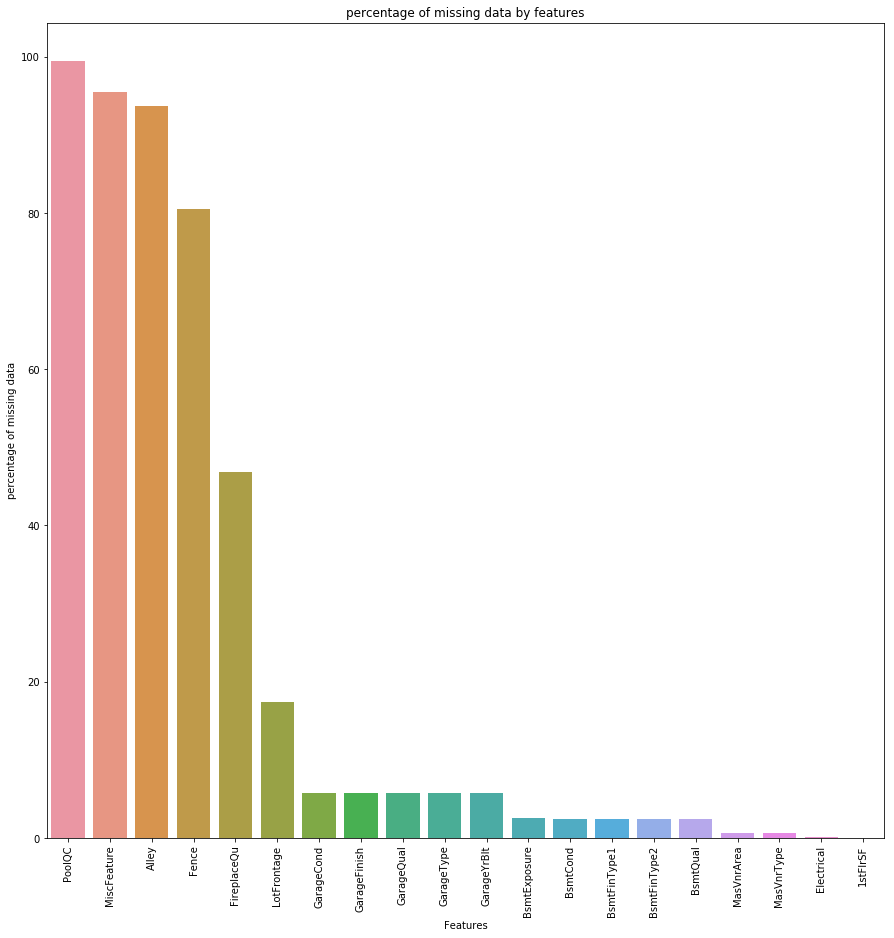

In [23]:
#visualizing the missingValue
plt.subplots(figsize = (15,15))
sns.barplot(x = missingValues.index[:20], y = missingValues['Percent'][:20], data = missingValues)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("percentage of missing data")
plt.title("percentage of missing data by features")
plt.show()


In [24]:
#Dropping the features which has more than 50% missing data
columnsToBeDropped = missingValues[missingValues['Percent']>=50].index
columnsToBeDropped

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [25]:
train = train.drop(columnsToBeDropped, axis = 1)

In [26]:
train.shape

(817, 76)

In [27]:
#Categorical columns
category_col = train.select_dtypes(include=['object']).columns
category_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
#numerical columns
numerical_col = train.select_dtypes(exclude=['object']).columns
numerical_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
# #creating a distinct dataset of categorical columns
# distinct_category_df = pd.DataFrame(index = np.arange(train.shape[0]))
# for col in category_col:
#     temp = pd.Series(data = train[col].unique())
#     distinct_category_df[col] = temp
# distinct_category_df

In [30]:
#FireplaceQu : data description says Null means "no fireplace"
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [31]:
# from sklearn.preprocessing import Imputer
# imp_median = Imputer(strategy = 'median')
# train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].

In [32]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
### GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [33]:

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond'):
    train[col] = train[col].fillna('None')

In [34]:
#GarageYrBlt replacing missing data with 0
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [35]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [36]:
train.groupby(by='Electrical')['Electrical'].count()
train['Electrical'].mode()[0]

'SBrkr'

In [37]:
#Electrical : It has one NA value. 
#Since this feature has mostly 'SBrkr', we can set that for the missing value.
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [38]:
train.isnull().sum().sort_values(ascending=False)

SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
SaleCondition    0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
                ..
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageFinish     0
GarageType       0
CentralAir       0
FireplaceQu      0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath    

In [39]:
#SalePrice Correlation Matrix
k=10
sns.set(font_scale=1.5)
corrmat=train.corr()
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index # fetching the column names for 10 lowest correlation values against SalePrice
print(cols)


Index(['KitchenAbvGr', 'EnclosedPorch', 'OverallCond', 'MSSubClass',
       'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'YrSold', 'BsmtFinSF2',
       'MoSold'],
      dtype='object')


In [40]:
Uncor = cols
train.drop(Uncor, axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 593 to 1126
Data columns (total 66 columns):
MSZoning         817 non-null object
LotFrontage      817 non-null float64
LotArea          817 non-null int64
Street           817 non-null object
LotShape         817 non-null object
LandContour      817 non-null object
Utilities        817 non-null object
LotConfig        817 non-null object
LandSlope        817 non-null object
Neighborhood     817 non-null object
Condition1       817 non-null object
Condition2       817 non-null object
BldgType         817 non-null object
HouseStyle       817 non-null object
OverallQual      817 non-null int64
YearBuilt        817 non-null int64
YearRemodAdd     817 non-null int64
RoofStyle        817 non-null object
RoofMatl         817 non-null object
Exterior1st      817 non-null object
Exterior2nd      817 non-null object
MasVnrType       817 non-null object
MasVnrArea       817 non-null float64
ExterQual        817 non-null object
ExterC

In [41]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [42]:
#Removing outliers
from pandas.api.types import is_numeric_dtype
def remove_outliers(df):
    low = .05
    high = .9
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df
    
remove_outliers(train).head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,TotalSF


In [43]:
#check the standardizing data
for name in list(train.columns):
    if is_numeric_dtype(train[name]):
        saleprice_scaled = StandardScaler().fit_transform(train[name][:,np.newaxis])

        low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:5]#[:,0] to exclude in the new dummy axis, argsort returns the index after sorting
        high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-5:]
        print('outer range (low) of the distribution:',name)
        print(low_range)
        print('\nouter range (high) of the distribution:',name)
        print(high_range)

outer range (low) of the distribution: LotFrontage
[[-2.3907321]
 [-2.3907321]
 [-2.3907321]
 [-2.3907321]
 [-2.3907321]]

outer range (high) of the distribution: LotFrontage
[[4.0102737 ]
 [4.34972098]
 [5.02861553]
 [5.02861553]
 [5.41655528]]
outer range (low) of the distribution: LotArea
[[-1.18415555]
 [-1.1765641 ]
 [-1.16802373]
 [-1.15663657]
 [-1.15663657]]

outer range (high) of the distribution: LotArea
[[ 4.93129378]
 [ 5.81488348]
 [ 5.86870139]
 [ 6.36973661]
 [20.16989492]]
outer range (low) of the distribution: OverallQual
[[-2.9410521 ]
 [-2.9410521 ]
 [-2.22825484]
 [-2.22825484]
 [-2.22825484]]

outer range (high) of the distribution: OverallQual
[[2.76132599]
 [2.76132599]
 [2.76132599]
 [2.76132599]
 [2.76132599]]
outer range (low) of the distribution: YearBuilt
[[-3.20898008]
 [-3.04319637]
 [-3.04319637]
 [-3.04319637]
 [-2.87741266]]

outer range (high) of the distribution: YearBuilt
[[1.23402331]
 [1.23402331]
 [1.23402331]
 [1.23402331]
 [1.26718005]]
outer ra

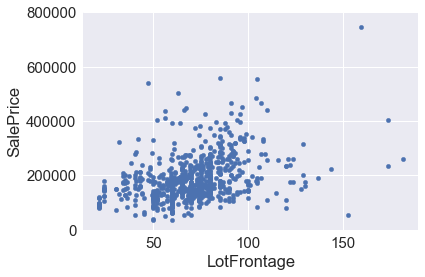

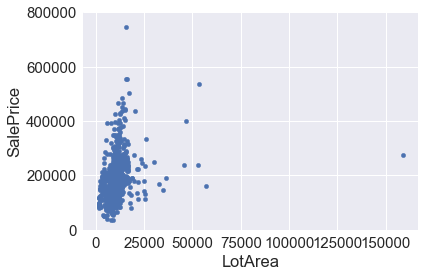

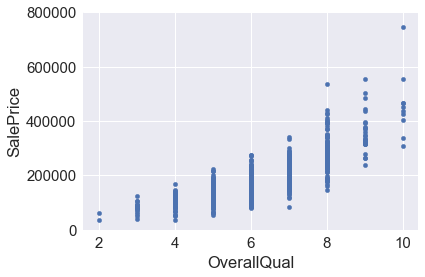

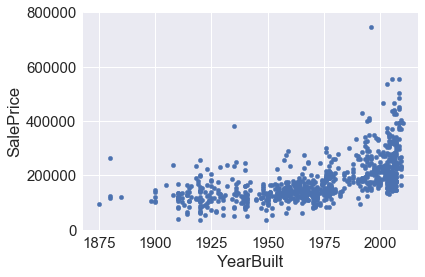

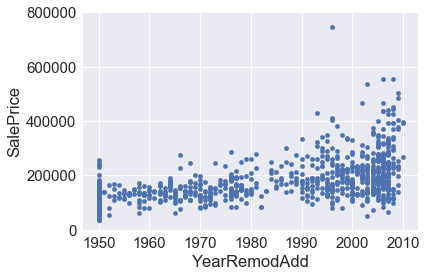

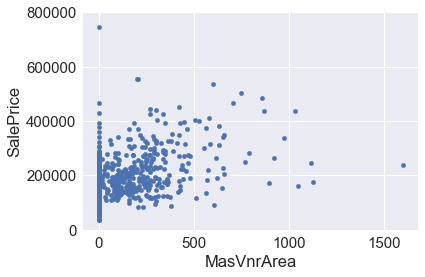

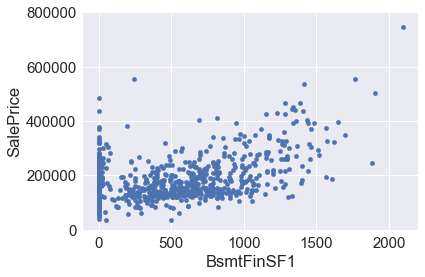

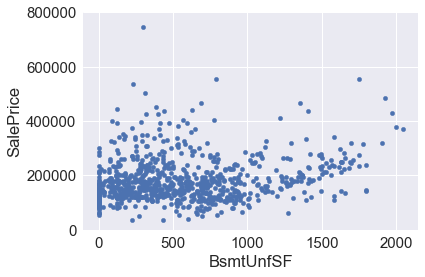

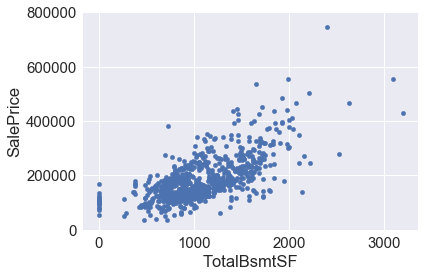

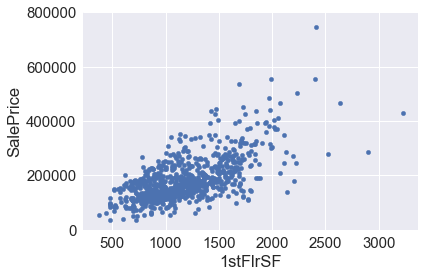

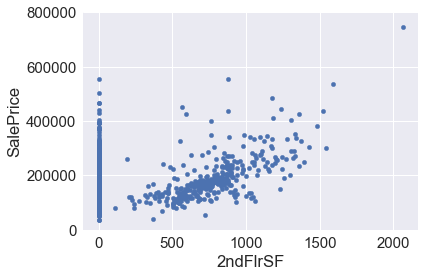

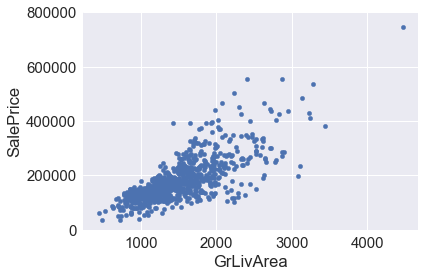

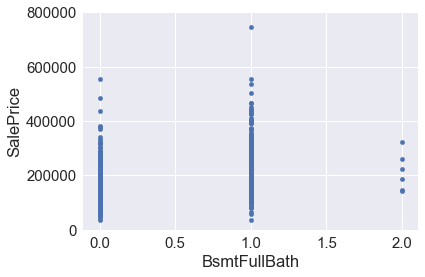

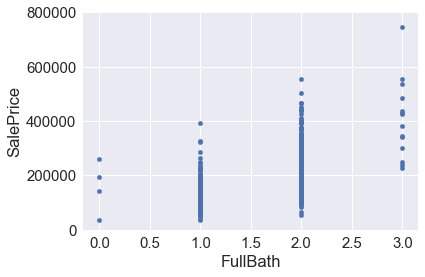

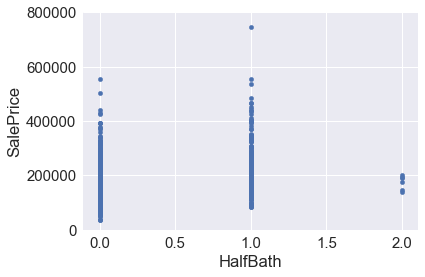

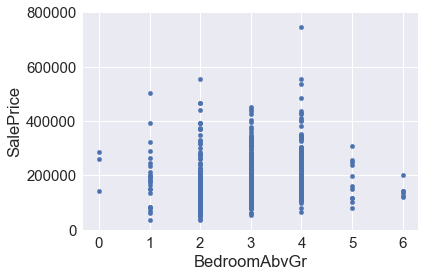

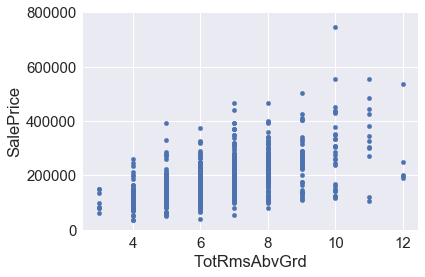

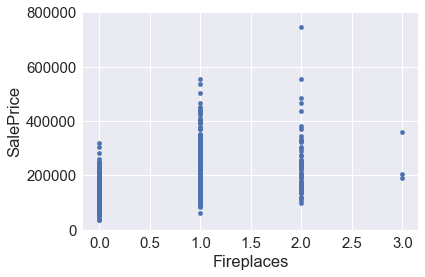

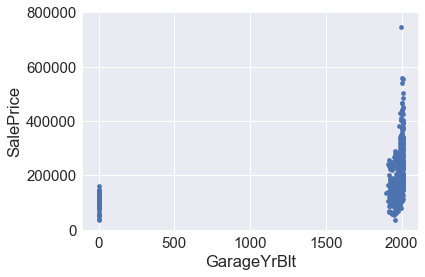

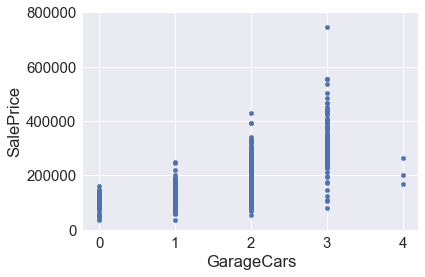

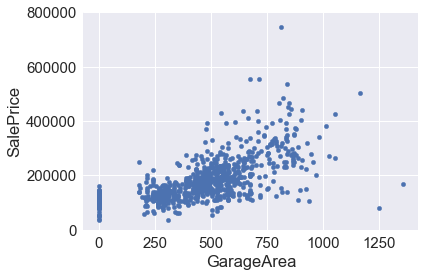

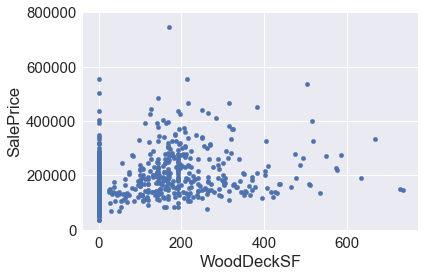

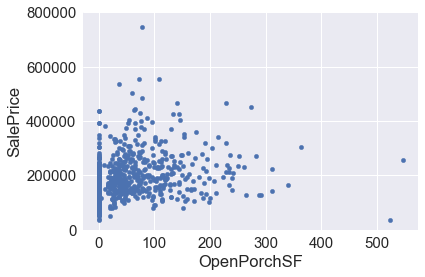

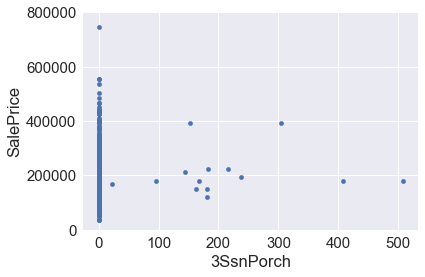

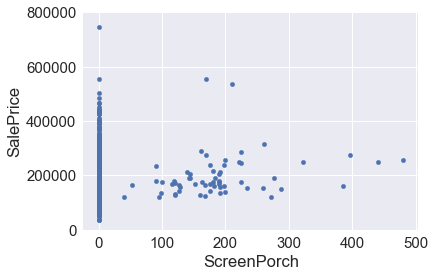

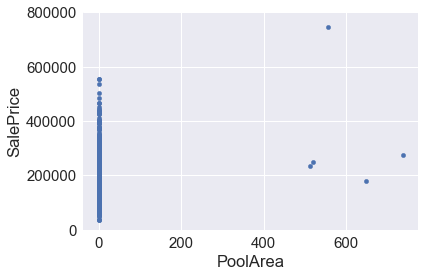

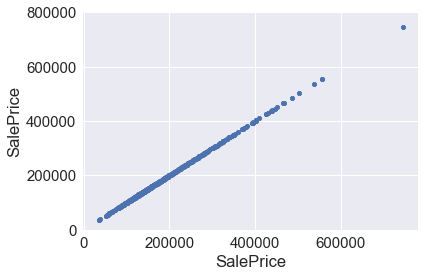

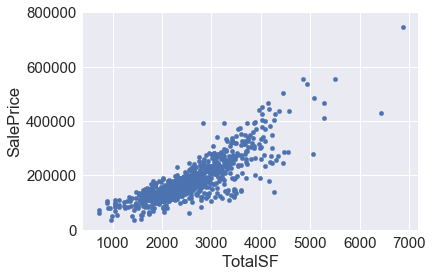

In [44]:
#Bivariate/Multivariate outlier checking with scatter plot
for name in list(train.columns):
    if is_numeric_dtype(train[name]):
        data = pd.concat([train['SalePrice'], train[name]], axis=1)
        data.plot.scatter(x=name, y='SalePrice', ylim=(0,800000))

In [45]:
#Dropping the outlier
#Only on the Feature that perform linear regression dot in the scatter plot
train = train.drop(train[train['LotFrontage'] > 300].index)
train = train.drop(train[train['LotArea'] > 60000].index)
train = train.drop(train[(train['OverallQual'] > 9) & (train['SalePrice'] < 200000)].index)
train = train.drop(train[train['MasVnrArea'] > 1500].index)
train = train.drop(train[train['TotalBsmtSF'] > 3000].index)
train = train.drop(train[train['BsmtFinSF1'] > 3000].index)
train = train.drop(train[train['1stFlrSF'] > 2500].index)
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index)
train = train.drop(train[train['BsmtFullBath'] > 2.5].index)
train = train.drop(train[train['HalfBath'] > 1.5].index)
train = train.drop(train[train['BedroomAbvGr'] > 4].index)
train = train.drop(train[train['TotRmsAbvGrd'] > 13].index)
train = train.drop(train[train['Fireplaces'] > 2.5].index)
train = train.drop(train[train['GarageCars'] > 3].index)
train = train.drop(train[train['GarageArea'] >= 1250].index)

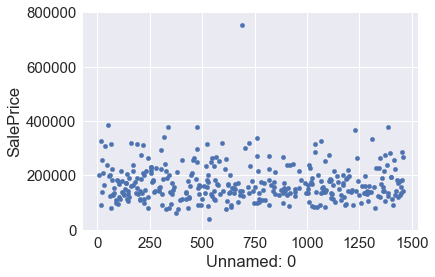

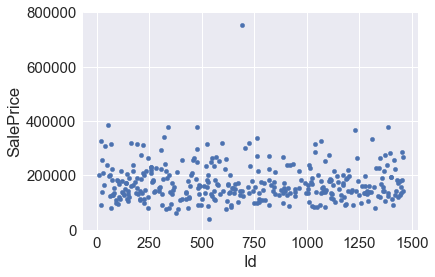

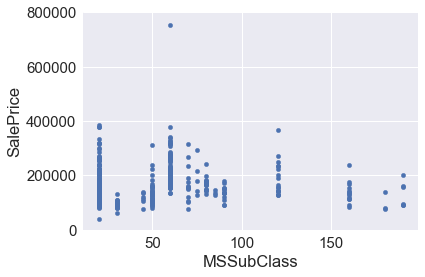

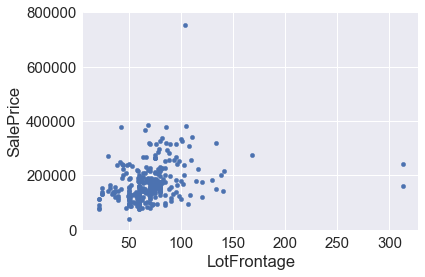

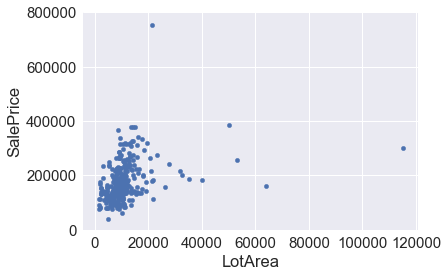

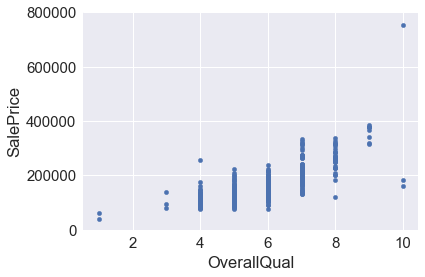

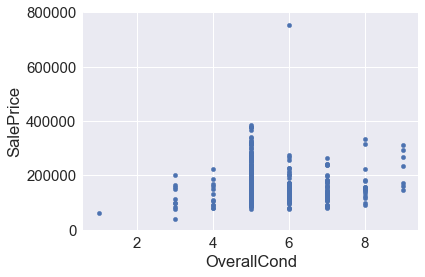

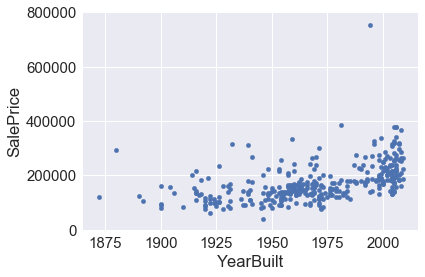

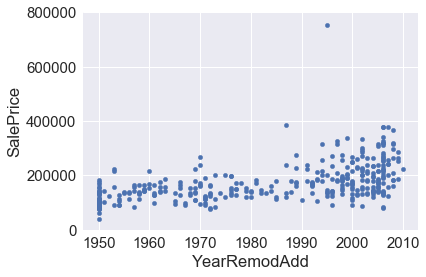

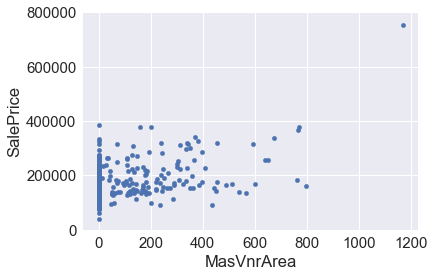

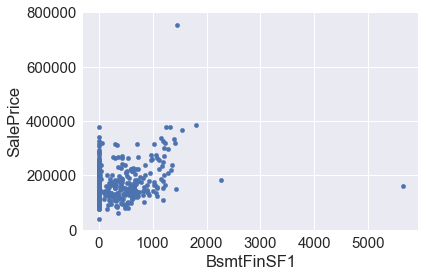

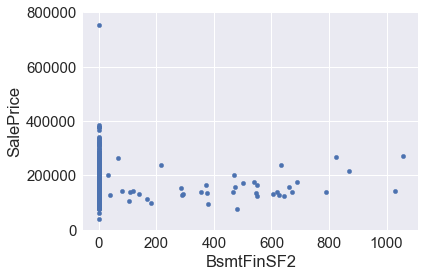

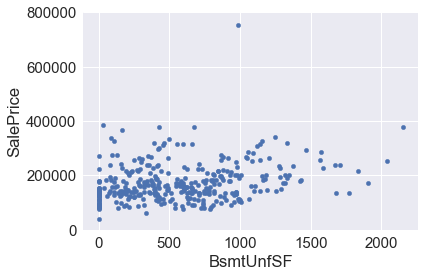

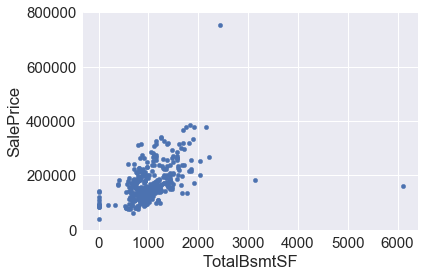

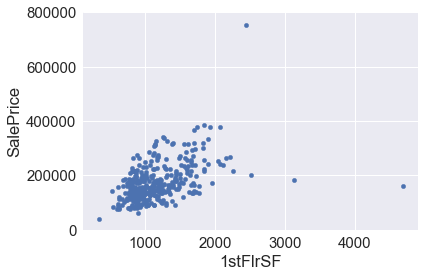

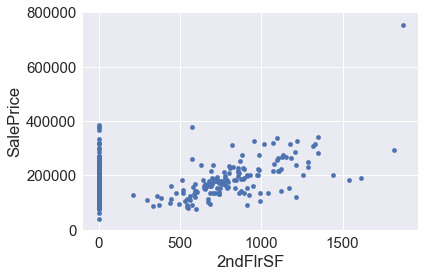

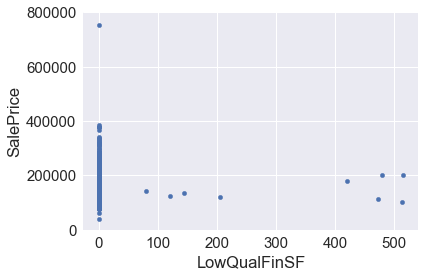

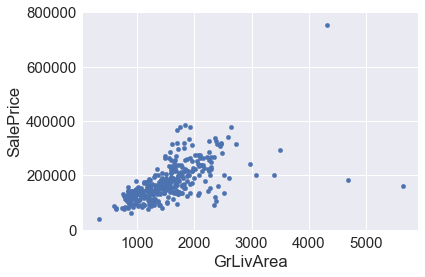

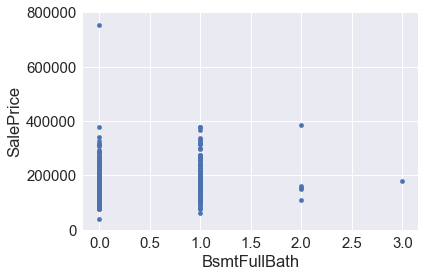

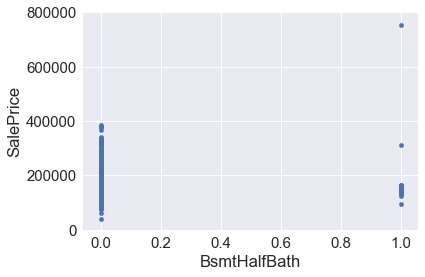

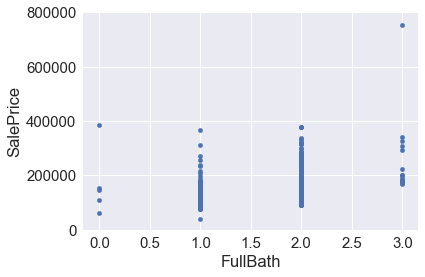

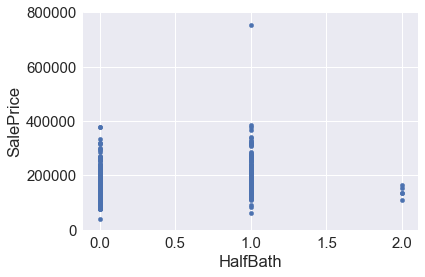

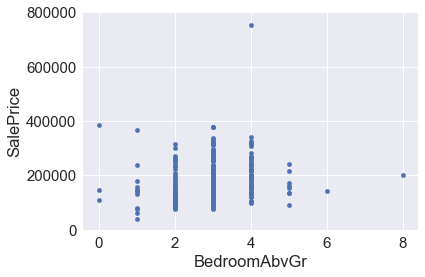

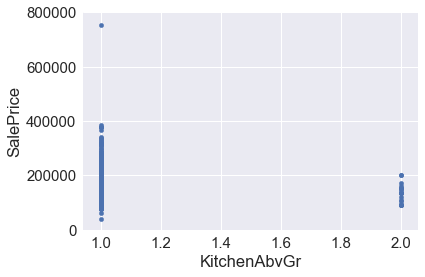

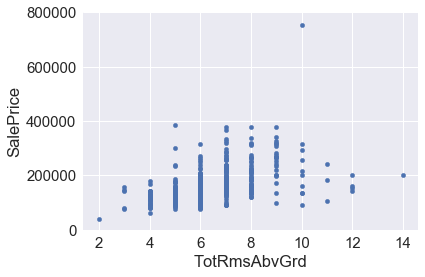

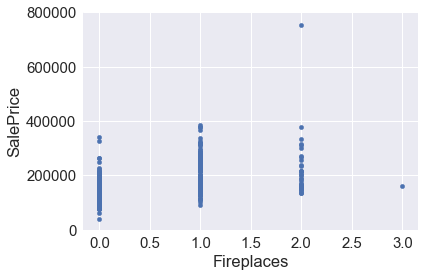

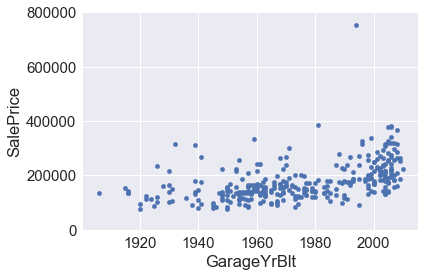

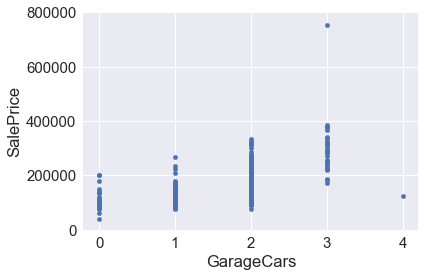

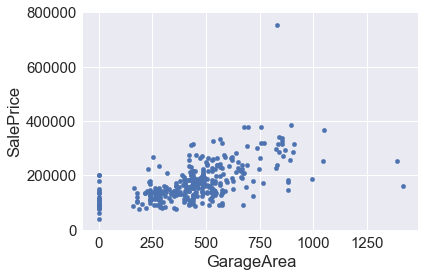

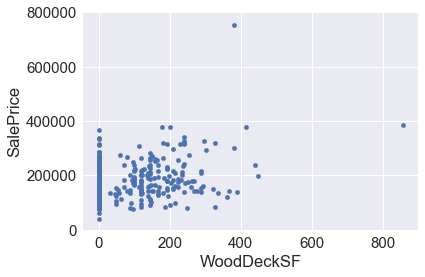

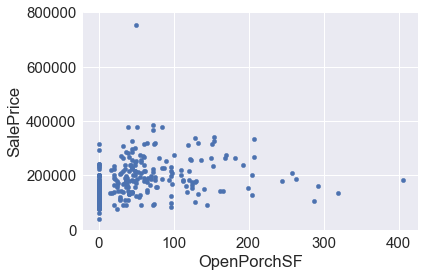

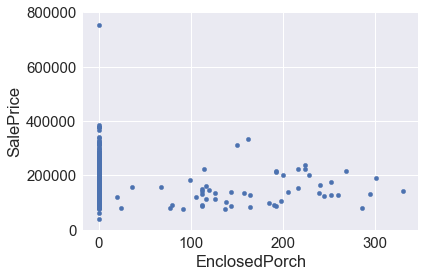

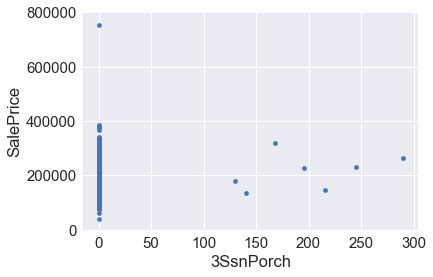

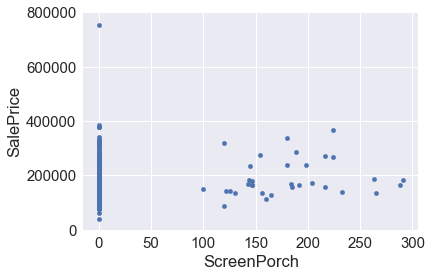

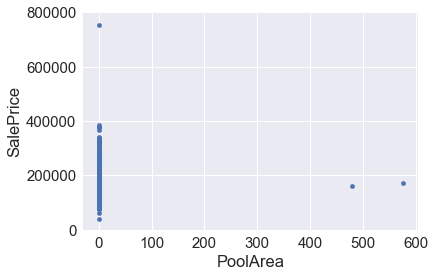

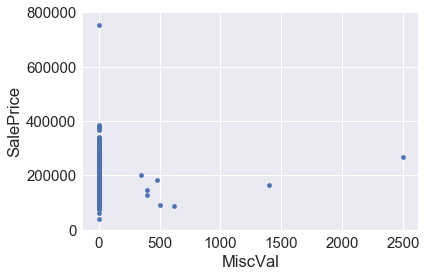

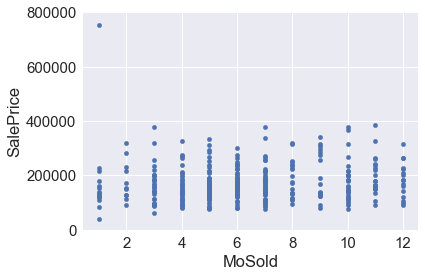

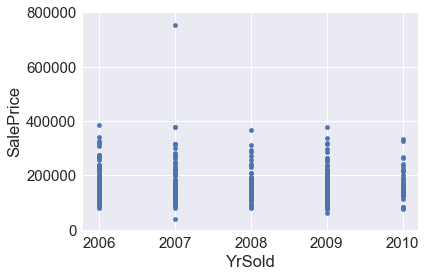

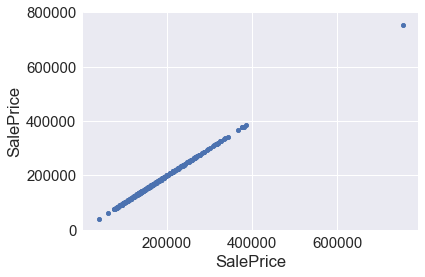

In [46]:
#Bivariate/Multivariate outlier checking with scatter plot
for name in list(X_test.columns):
    if is_numeric_dtype(X_test[name]):
        data = pd.concat([X_test['SalePrice'], X_test[name]], axis=1)
        data.plot.scatter(x=name, y='SalePrice', ylim=(0,800000))

In [47]:
#skewed features
numeric_feats = train.dtypes[train.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
#skewed_feats
# print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)

,Skew
PoolArea,14.307517
3SsnPorch,10.469442
ScreenPorch,4.325959
LotArea,3.764632
MasVnrArea,2.378051
OpenPorchSF,2.089311
SalePrice,1.703566
WoodDeckSF,1.452802
GrLivArea,1.043002
BsmtUnfSF,0.944800


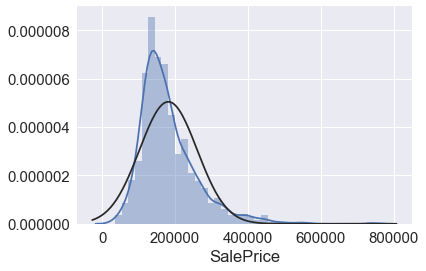

In [48]:
sns.distplot(train['SalePrice'],fit = norm)

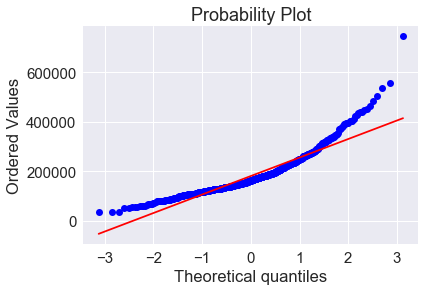

In [49]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot  = plt)

In [50]:
skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features:".format(skewness.shape[0]))

There are 28 skewed numerical features:


In [51]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df_train[feat] += 1
    train [feat] = boxcox1p(train[feat], lam)

In [52]:
skewed_features

Index(['PoolArea', '3SsnPorch', 'ScreenPorch', 'LotArea', 'MasVnrArea',
       'OpenPorchSF', 'SalePrice', 'WoodDeckSF', 'GrLivArea', 'BsmtUnfSF',
       '2ndFlrSF', 'LotFrontage', 'TotalSF', 'BsmtFinSF1', 'TotRmsAbvGrd',
       '1stFlrSF', 'HalfBath', 'Fireplaces', 'BsmtFullBath', 'TotalBsmtSF',
       'OverallQual', 'GarageArea', 'FullBath', 'GarageCars', 'BedroomAbvGr',
       'YearRemodAdd', 'YearBuilt', 'GarageYrBlt'],
      dtype='object')

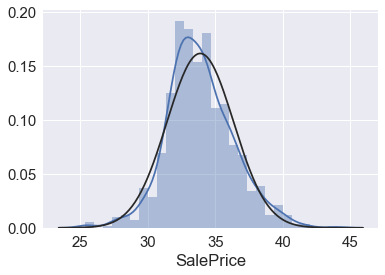

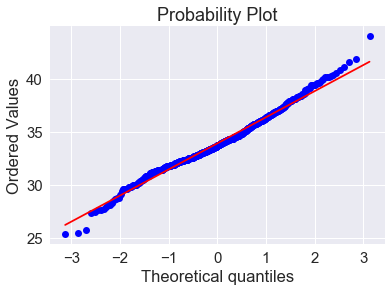

In [53]:
#check
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [54]:
# cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC','KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'CentralAir']

## Checking  unique values for each categorical variable

In [55]:
for i in train.select_dtypes(include = 'object'):
    print(train.groupby(i)[i].count())

MSZoning
C (all)      8
FV          42
RH           4
RL         625
RM         104
Name: MSZoning, dtype: int64
Street
Grvl      4
Pave    779
Name: Street, dtype: int64
LotShape
IR1    258
IR2     28
IR3      5
Reg    492
Name: LotShape, dtype: int64
LandContour
Bnk     20
HLS     21
Low     14
Lvl    728
Name: LandContour, dtype: int64
Utilities
AllPub    783
Name: Utilities, dtype: int64
LotConfig
Corner     140
CulDSac     46
FR2         27
FR3          3
Inside     567
Name: LotConfig, dtype: int64
LandSlope
Gtl    751
Mod     29
Sev      3
Name: LandSlope, dtype: int64
Neighborhood
Blmngtn     10
Blueste      1
BrDale      11
BrkSide     34
ClearCr     10
CollgCr     81
Crawfor     23
Edwards     46
Gilbert     37
IDOTRR      22
MeadowV      9
Mitchel     22
NAmes      125
NPkVill      5
NWAmes      41
NoRidge     26
NridgHt     47
OldTown     54
SWISU       11
Sawyer      38
SawyerW     27
Somerst     56
StoneBr     18
Timber      22
Veenker      7
Name: Neighborhood, dtype: in

In [56]:
# from sklearn.preprocessing import LabelEncoder
# colomns = train.dtypes[train.dtypes == "object"].index
# # process columns, apply LabelEncoder to categorical features
# for name in colomns:
#     lbl = LabelEncoder() 
#     lbl.fit(list(train[name].values)) 
#     train[name] = lbl.transform(list(train[name].values))

# # shape        
# print('Shape of df_train: {}'.format(train.shape))

In [57]:
#Dummy categorical features
train = pd.get_dummies(train)
print(train.shape)
train.head(20) #please compare the data after engineering and before engineering

#train, test = train.align(test, join='inner', axis=1) # maybe 'outer' is better#

(783, 261)


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
593,5.559490,21.458774,2.602594,14.175018,14.176584,10.648351,11.561460,12.686669,14.234060,14.264759,...,0,0,0,1,0,0,0,0,1,0
788,5.995517,19.679117,2.602594,14.193765,14.195323,9.308253,13.328619,7.104297,13.567978,13.582762,...,0,1,0,0,0,0,0,0,0,1
490,5.684507,18.371516,2.259674,14.079819,14.154600,0.000000,10.221051,4.492018,10.371953,10.371953,...,0,0,0,1,0,0,0,0,1,0
654,6.512196,19.976972,2.259674,14.182841,14.182841,9.163203,0.000000,11.940047,11.940047,12.016594,...,0,0,0,1,0,0,0,0,1,0
963,5.942124,19.446326,2.055642,14.116605,14.168748,6.337529,10.594136,9.794431,12.147822,12.271365,...,0,0,0,1,1,0,0,0,0,0
730,6.360100,20.023090,2.440268,14.160895,14.162467,7.774945,4.380946,0.000000,13.306760,13.406985,...,0,0,0,1,0,0,0,0,1,0
60,6.073289,19.955504,1.540963,14.107044,14.107044,0.000000,0.000000,0.000000,0.000000,11.963791,...,0,0,0,1,0,0,0,0,1,0
690,6.148461,19.595353,1.820334,14.118196,14.118196,0.000000,10.603239,9.596992,11.981486,12.705684,...,0,0,0,1,0,0,0,0,1,0
92,5.887419,21.888251,2.440268,14.184404,14.185966,0.000000,0.000000,13.124717,13.124717,13.160227,...,0,0,0,1,0,0,0,0,1,0
814,5.684507,18.598238,2.055642,14.103852,14.103852,0.000000,0.000000,0.000000,0.000000,12.257862,...,0,0,0,1,0,0,0,0,1,0


In [58]:
ytrain = train['SalePrice']

In [59]:
train = train.drop(labels = 'SalePrice', axis = 1)

In [60]:
print(train.shape,ytrain.shape)

(783, 260) (783,)


In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [62]:
lm.fit(train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Transformation function for the splitted test data

In [64]:
def tranformations(test,skewed_features):
    test.drop(labels = ["Id","Unnamed: 0"], axis = 1, inplace = True) #commented as the test data didnt had column unnamed:0
    #test.drop(labels = ["Id"], axis = 1, inplace = True)
    test.drop(labels = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, inplace = True)
    test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
    test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond'):
        test[col] = test[col].fillna('None')
    test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
    test["MasVnrType"] = test["MasVnrType"].fillna("None")
    test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
    test['Electrical'] = 'SBrkr'
    test.drop(['KitchenAbvGr', 'EnclosedPorch', 'OverallCond', 'MSSubClass',
       'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'YrSold', 'BsmtFinSF2',
       'MoSold'], axis=1, inplace=True)
    test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
    
    #test = remove_outliers(test)
    
    #Dropping the outlier
    #Only on the Feature that perform linear regression dot in the scatter plot
    test = test.drop(test[test['LotFrontage'] > 300].index)
    test = test.drop(test[test['LotArea'] > 60000].index)
    test = test.drop(test[(test['OverallQual'] > 9) & (test['SalePrice'] < 200000)].index)
    test = test.drop(test[test['MasVnrArea'] > 1500].index)
    test = test.drop(test[test['TotalBsmtSF'] > 3000].index)
    test = test.drop(test[test['BsmtFinSF1'] > 3000].index)
    test = test.drop(test[test['1stFlrSF'] > 2500].index)
    test = test.drop(test[(test['GrLivArea'] > 4000) & (test['SalePrice'] < 200000)].index)
    test = test.drop(test[test['BsmtFullBath'] > 2.5].index)
    test = test.drop(test[test['HalfBath'] > 1.5].index)
    test = test.drop(test[test['BedroomAbvGr'] > 4].index)
    test = test.drop(test[test['TotRmsAbvGrd'] > 13].index)
    test = test.drop(test[test['Fireplaces'] > 2.5].index)
    test = test.drop(test[test['GarageCars'] > 3].index)
    test = test.drop(test[test['GarageArea'] >= 1250].index)
    
    from scipy.special import boxcox1p
    lam = 0.15
    for feat in skewed_features:
        #df_train[feat] += 1
        test [feat] = boxcox1p(test[feat], lam)
    #train = pd.get_dummies(train, columns=col)
    test = pd.get_dummies(test)
    return test
    

In [65]:
X_test_copy = tranformations(X_test,skewed_features)

In [66]:
y_test = X_test_copy['SalePrice']

In [67]:
X_test_copy = X_test_copy.drop(labels = 'SalePrice', axis = 1)

In [68]:
X_test.shape

(351, 67)

In [69]:
len(lm.coef_)

260

## Aligning test set with the train set

In [70]:
train, X_test_copy = train.align(X_test_copy, join='left', axis=1)

In [71]:
print(X_test_copy.shape)

(329, 260)


In [72]:
X_test_copy.isnull().sum()

LotFrontage                0
LotArea                    0
OverallQual                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 0
BsmtFinSF1                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
GrLivArea                  0
BsmtFullBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt                0
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
TotalSF                    0
MSZoning_C (all)         329
MSZoning_FV                0
MSZoning_RH                0
                        ... 
GarageQual_Ex            329
GarageQual_Fa              0
GarageQual_Gd              0
GarageQual_Non

In [73]:
X_test_copy.fillna(0,inplace = True)

In [74]:
X_test_copy.isnull().sum()

LotFrontage              0
LotArea                  0
OverallQual              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
GrLivArea                0
BsmtFullBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
TotalSF                  0
MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
                        ..
GarageQual_Ex            0
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_None          0
GarageQual_Po            0
GarageQual_TA            0
G

In [75]:
X_test_copy

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
694,5.914940,19.760176,2.055642,14.103852,14.176584,0.000000,5.321541,0.000000,12.338074,12.338074,...,0,0,0,1,0,0.0,0,0.0,1,0
1116,6.047664,20.227251,1.820334,14.127727,14.127727,5.285266,10.371953,9.951172,12.010769,12.010769,...,0,0,0,1,0,0.0,0,0.0,1,0
58,6.360100,21.029699,2.750250,14.193765,14.195323,9.322355,12.726949,10.083791,13.677399,13.677399,...,0,0,0,1,0,0.0,0,0.0,1,0
70,6.221214,21.482504,2.259674,14.137234,14.137234,8.622254,9.812269,9.770476,11.591440,12.387901,...,0,0,0,1,0,0.0,0,0.0,1,0
1030,3.932510,13.284765,1.820334,14.138816,14.138816,0.000000,7.483296,0.000000,10.868631,10.868631,...,0,0,0,1,0,0.0,0,0.0,1,0
352,5.684507,19.882164,0.730463,14.058863,14.103852,0.000000,9.391827,9.272687,11.082058,11.843317,...,0,0,0,1,0,0.0,0,0.0,1,0
643,6.221214,19.951981,2.259674,14.121376,14.121376,10.226206,8.930418,11.147538,13.015963,13.015963,...,0,0,0,0,0,0.0,0,0.0,1,0
244,5.133567,18.180219,2.602594,14.192207,14.192207,7.848990,4.137711,12.981131,13.033249,13.033249,...,0,0,0,1,0,0.0,0,0.0,1,0
298,5.802739,18.501410,2.055642,14.149872,14.149872,0.000000,0.000000,0.000000,0.000000,13.371936,...,0,0,0,1,0,0.0,1,0.0,0,0
328,5.968981,20.088960,2.055642,14.118196,14.118196,0.000000,12.175675,9.590598,13.093081,13.680989,...,0,0,0,1,0,0.0,0,0.0,1,0


In [76]:
predictions = lm.predict(X_test_copy)

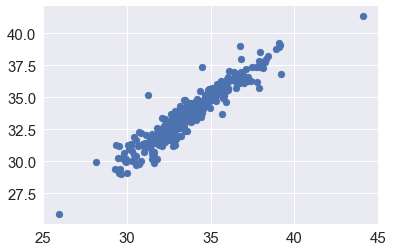

In [77]:
plt.scatter(y_test, predictions)

In [78]:
from sklearn import metrics

In [79]:
# print("MAE:",metrics.mean_absolute_error(np.log(y_test),np.log(predictions))
# print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(np.log(y_test),np.log(predictions))))

RMSE: 0.02153529474213763


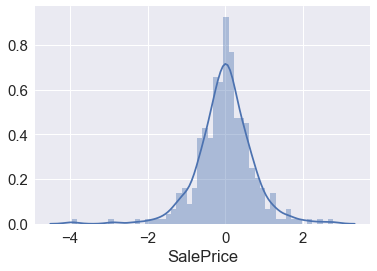

In [80]:
sns.distplot((y_test-predictions),bins=50);

In [81]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [82]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, ytrain, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [83]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [84]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [85]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [86]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [87]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [88]:
#Base Model scores
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.7969 (0.1491)

ElasticNet score: 0.7971 (0.1483)

Gradient Boosting score: 0.7685 (0.1420)

Xgboost score: 0.7793 (0.1593)



In [89]:
class AveragingModels(BaseEstimator, TransformerMixin, RegressorMixin):
    def __init__(self,models):
        self.models = models
    
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
    
        for model in self.models_:
            model.fit(X,y)
    
        return self
    
    def predict(self, X):
        predictions  = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis = 1)

In [90]:
averaged_models = AveragingModels(models = (ENet,GBoost,lasso))

score = rmsle_cv(averaged_models)

print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

Averaged base models score: 0.7427 (0.1475)



In [95]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

#print("test shape: {}, train shape: {}".format(X_test_copy, y_train.shape))

# train=train.drop(train.index[[0,4]],axis=0)

averaged_models.fit(train, ytrain)
Xtestcpy_pred = averaged_models.predict(X_test_copy)
#avg_pred = np.expm1(averaged_models.predict(test))

print(rmse(y_test, Xtestcpy_pred))

0.01787686233827936


In [ ]:
# class StackingAveragedModels(BaseEstimator, TransformerMixin, RegressorMixin):
#     def __init__(self, base_models, meta_model, n_folds = 5):
#         self.base_models = base_models
#         self.meta_model = meta_model
#         self.n_folds = n_folds
    
#     def fit(self, X, y):
#         self.base_models_ = [list() for x in self.base_models]
#         self.meta_model_ = clone(self.meta_model)
#         kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
#         out_of_fold_predictions = np.zeros(X.shape[0], len(self.base_models))
        
#         for i, model in enumerate(self.base_models):
            
#             for train_index, hold_out_index in kfold.split(X,y):
#                 instance = clone(model)
#                 self.base_models_[i].append(instance)
#                 instance.fit(X[train_index],y[train_index])
#                 y_pred = instance.predict(X[hold_out_index])
#                 out_of_fold_predictions[hold_out_index, i] = y_pred
        
#         self.meta_model_.fit(out_of_fold_predictions,y)
#         return self
    
#     def predict(self, X):
#         meta_features = np.column_stack([
#             np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
#             for base_models in self.base_models_ ])
#         return self.meta_model_.predict(meta_features)

In [ ]:
# stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
#                                                  meta_model = lasso)

# score = rmsle_cv(stacked_averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

# processing the actual test file and predicting using created model

In [96]:
dtest = pd.read_csv('./dataset/boston/test.csv')

In [97]:
dtest.shape

(1459, 80)

In [98]:
dtest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [99]:
def test_tranform(test,skewed_features):
    #test.drop(labels = ["Id","Unnamed: 0"], axis = 1, inplace = True) commented as the test data didnt had column unnamed:0
    test.drop(labels = ["Id"], axis = 1, inplace = True)
    test.drop(labels = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, inplace = True)
    test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
    test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond'):
        test[col] = test[col].fillna('None')
    test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
    test["MasVnrType"] = test["MasVnrType"].fillna("None")
    test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
    test['Electrical'] = 'SBrkr'
    test.drop(['KitchenAbvGr', 'EnclosedPorch', 'OverallCond', 'MSSubClass',
       'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'YrSold', 'BsmtFinSF2',
       'MoSold'], axis=1, inplace=True)
    test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
    
    #test = remove_outliers(test)
    
    #Dropping the outlier
    #Only on the Feature that perform linear regression dot in the scatter plot
#     test = test.drop(test[test['LotFrontage'] > 300].index)
#     test = test.drop(test[test['LotArea'] > 60000].index)
#     #test = test.drop(test[(test['OverallQual'] > 9) & (test['SalePrice'] < 200000)].index)
#     test = test.drop(test[test['MasVnrArea'] > 1500].index)
#     test = test.drop(test[test['TotalBsmtSF'] > 3000].index)
#     test = test.drop(test[test['BsmtFinSF1'] > 3000].index)
#     test = test.drop(test[test['1stFlrSF'] > 2500].index)
#     #test = test.drop(test[(test['GrLivArea'] > 4000) & (test['SalePrice'] < 200000)].index)
#     test = test.drop(test[test['BsmtFullBath'] > 2.5].index)
#     test = test.drop(test[test['HalfBath'] > 1.5].index)
#     test = test.drop(test[test['BedroomAbvGr'] > 4].index)
#     test = test.drop(test[test['TotRmsAbvGrd'] > 13].index)
#     test = test.drop(test[test['Fireplaces'] > 2.5].index)
#     test = test.drop(test[test['GarageCars'] > 3].index)
#     test = test.drop(test[test['GarageArea'] >= 1250].index)
    
    from scipy.special import boxcox1p
    lam = 0.15

    for feat in skewed_features:
        #df_train[feat] += 1
        test [feat] = boxcox1p(test[feat], lam)
    #train = pd.get_dummies(train, columns=col)
    test = pd.get_dummies(test)
    return test
    

In [100]:
sf = [i for i in skewed_features if i != 'SalePrice']

In [101]:
test_id = dtest['Id']

In [102]:
test = test_tranform(dtest,sf)

In [103]:
train, test = train.align(test, join='left', axis=1)

In [104]:
test.fillna(0,inplace = True)

In [105]:
pred = averaged_models.predict(test)

In [106]:
pred.shape

(1459,)

In [107]:
len(test_id)

1459

In [108]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = pred
sub.to_csv('submission.csv',index=False)